# Avocado Project


Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
avocado_df = pd.read_csv("avocado.csv")
print("Successfully Imported Data!")
avocado_df

Successfully Imported Data!


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Starting the EDA

In [5]:
# Checking dimension of Datas
avocado_df.shape

(18249, 14)

- This dataset contains 18249 rows and 14 columns out of which 11 are features and 1 is label(output)

In [6]:
# Checking data type
avocado_df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- from above observation we find that , there are 2 integer columns, 3 object columns and rest are float columns.

In [7]:
# Checking for null values if any
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- No null values are present in dataset

<AxesSubplot:>

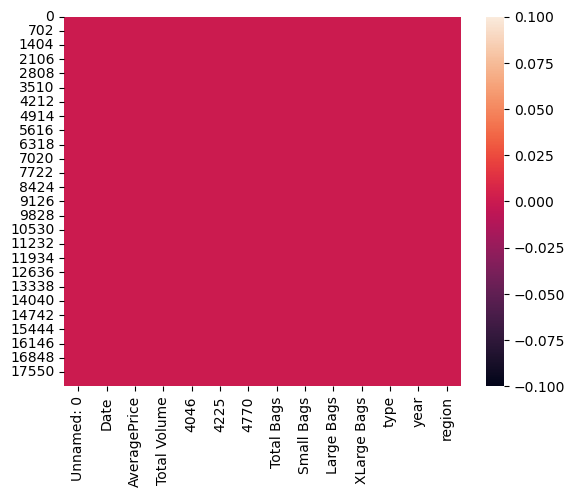

In [8]:
sns.heatmap(avocado_df.isnull())

In [9]:
# Checking for white spaces
avocado_df.loc[0:]==" "

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- No white speces are present in dataset

In [10]:
#Check for duplicate data
avocado_df.duplicated().sum()

0

- There is no duplicate data in the dataset

In [11]:
avocado_df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

- In dataset, 4 years of data is present from 54 regions.

# Deleting unwanted column

In [12]:
avocado_df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
# dropping date column beacuse we use year column
avocado_df.drop('Date',axis=1,inplace=True)

In [15]:
# Checking the overview of the dataset
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


# Data Visualization

# Univariate Analysis

<AxesSubplot:xlabel='type', ylabel='count'>

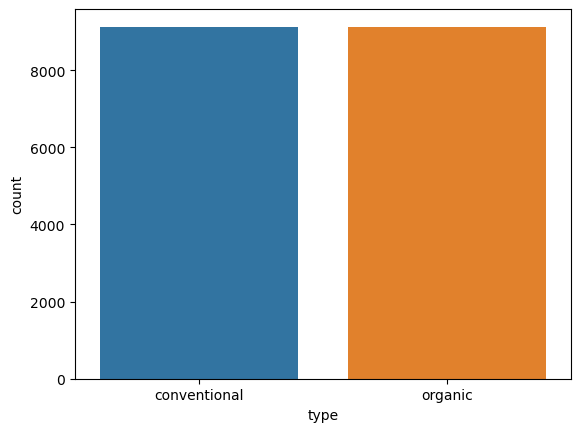

In [16]:
sns.countplot(x='type',data=avocado_df)

- There are 2 types of Avocado 1. Conventional 2. Organic
- Both types having almost same demand.

<AxesSubplot:xlabel='year', ylabel='count'>

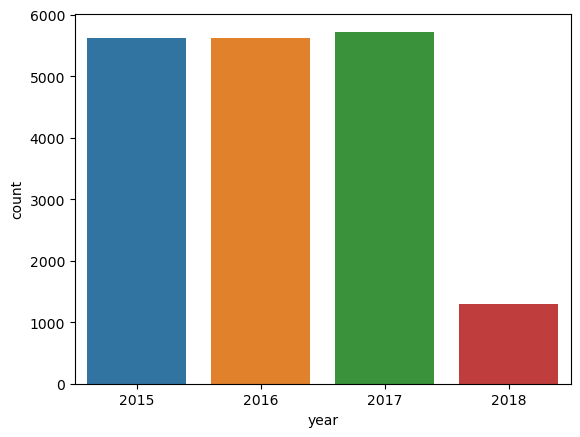

In [17]:
sns.countplot(x="year", data=avocado_df)

- here we can see that, Avocado having good sale in 2015,2016,2017 and very less sale in 2018.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:xlabel='region', ylabel='count'>

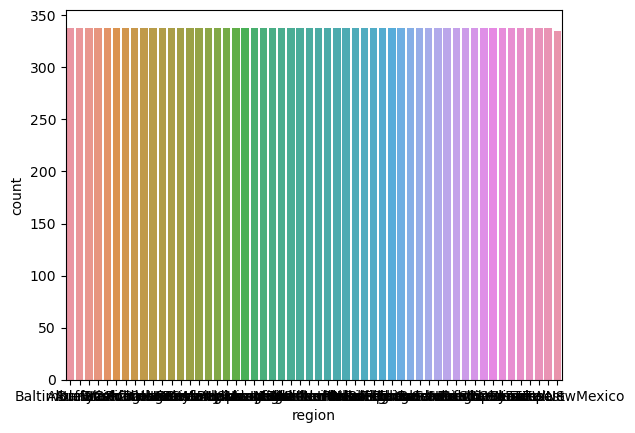

In [18]:
print(avocado_df['region'].value_counts())
sns.countplot(x="region", data=avocado_df)

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

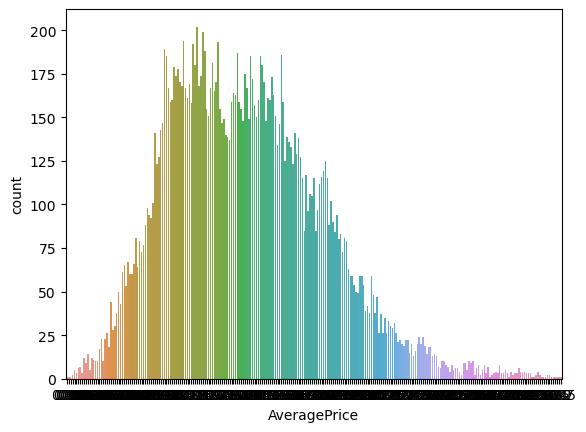

In [19]:
sns.countplot(avocado_df['AveragePrice'])

- We can see average price of most samples is distributed in range of 100-150.

# Bivariate Visualization

<AxesSubplot:xlabel='year', ylabel='count'>

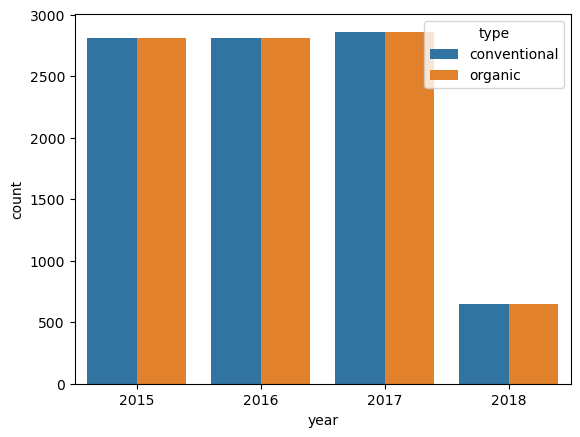

In [20]:
# Count plot to check year-wise value counts of type of Avocado
sns.countplot(x="year", data=avocado_df,hue="type")

- Both types of avocado sale equally.

Text(0, 0.5, 'AveragePrice')

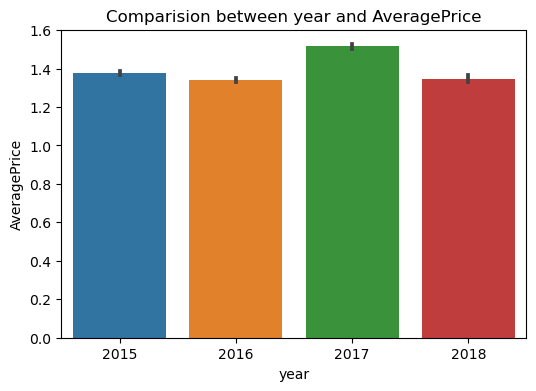

In [21]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[6,4])
plt.title('Comparision between year and AveragePrice')
sns.barplot(avocado_df['year'],avocado_df['AveragePrice'], data=avocado_df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

- Year 2017 have more average price and 2016 have less average price

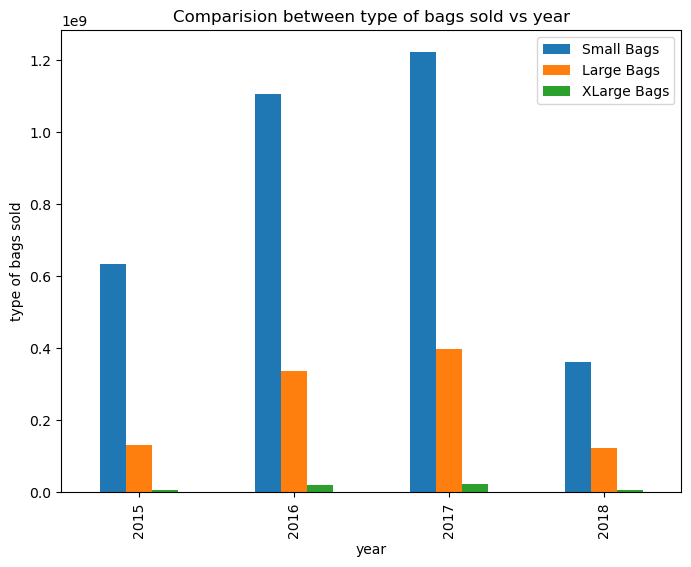

In [22]:
feature = avocado_df[["Small Bags","Large Bags","XLarge Bags"]].groupby(avocado_df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(8,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

- Small bag having good demand than large and xl- bags.

# Now we have only type and Region as a Categarical column, Lets conert it into numerical data using LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
avocado_df['type']=le.fit_transform(avocado_df['type'])
avocado_df['region']=le.fit_transform(avocado_df['region'])
avocado_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [24]:
#Checking description of dataset
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


<AxesSubplot:>

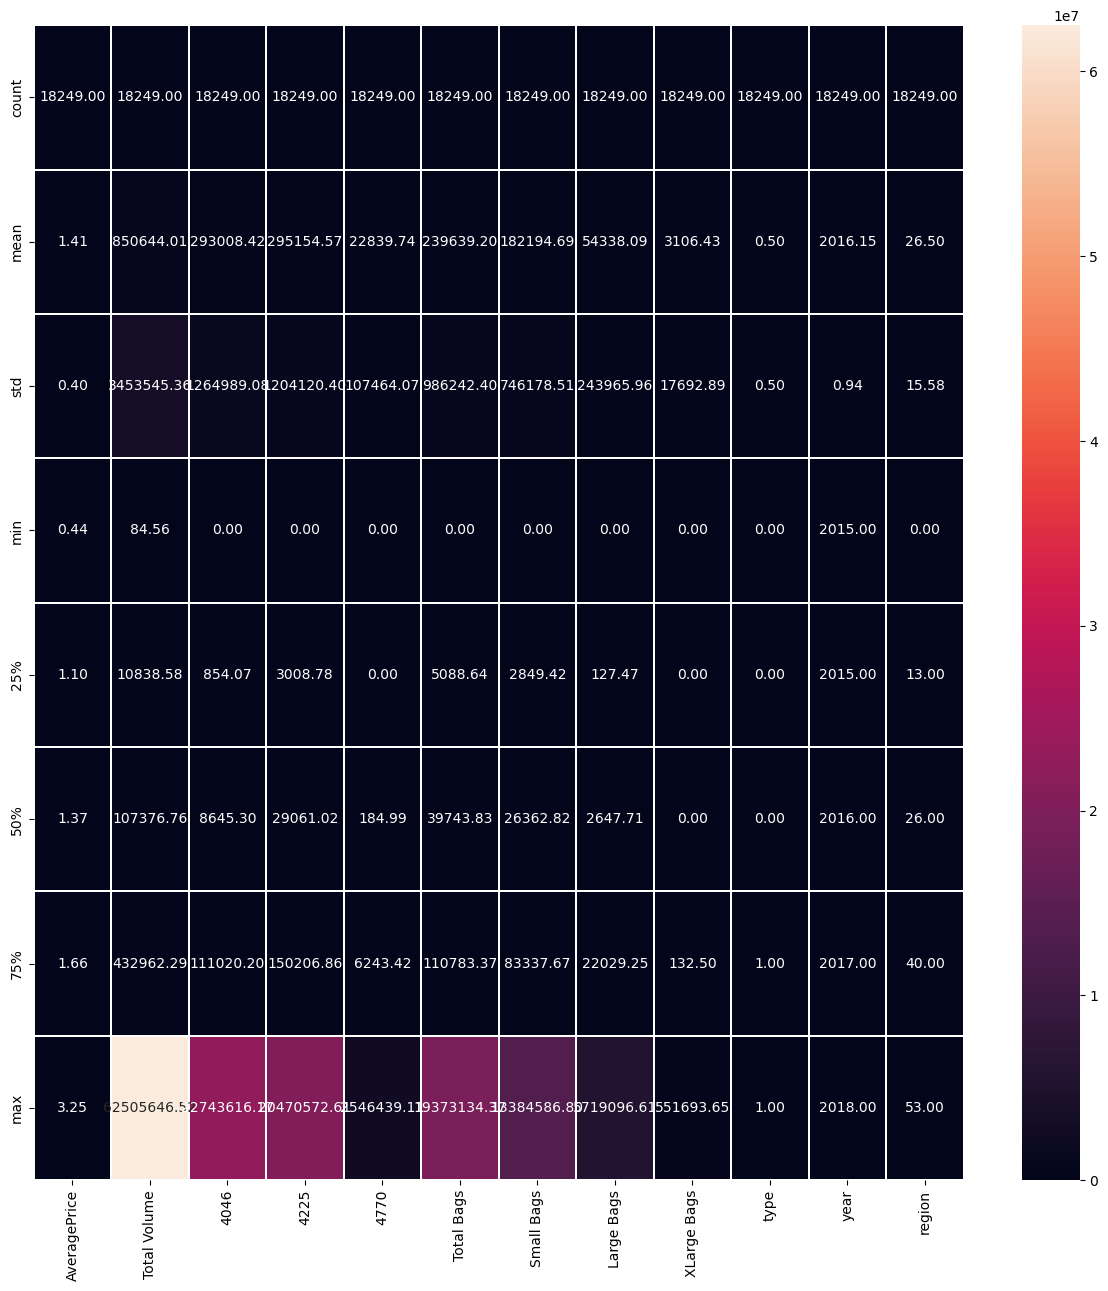

In [25]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(avocado_df.describe(),linewidths = 0.1,fmt='0.2f',annot = True)

- We can see mean in columns 'AveragePrice','Total Volume','4225','4770'.'Large Bags','Xlarge Bags' is higher than median, and therefore we can say data is right skewed.
- We can see mean in columns '4046','Total Bags','Small Bags' is smaller than median, and thus data in these columns is left skewed
- Also we can observe max of columns 'AvaeragePrice','TotalVolume','4770','TotalBags','SmallBags','LargeBags','XlargeBags' is exceptionally high than 75%, so we can say outliers are present in these columns

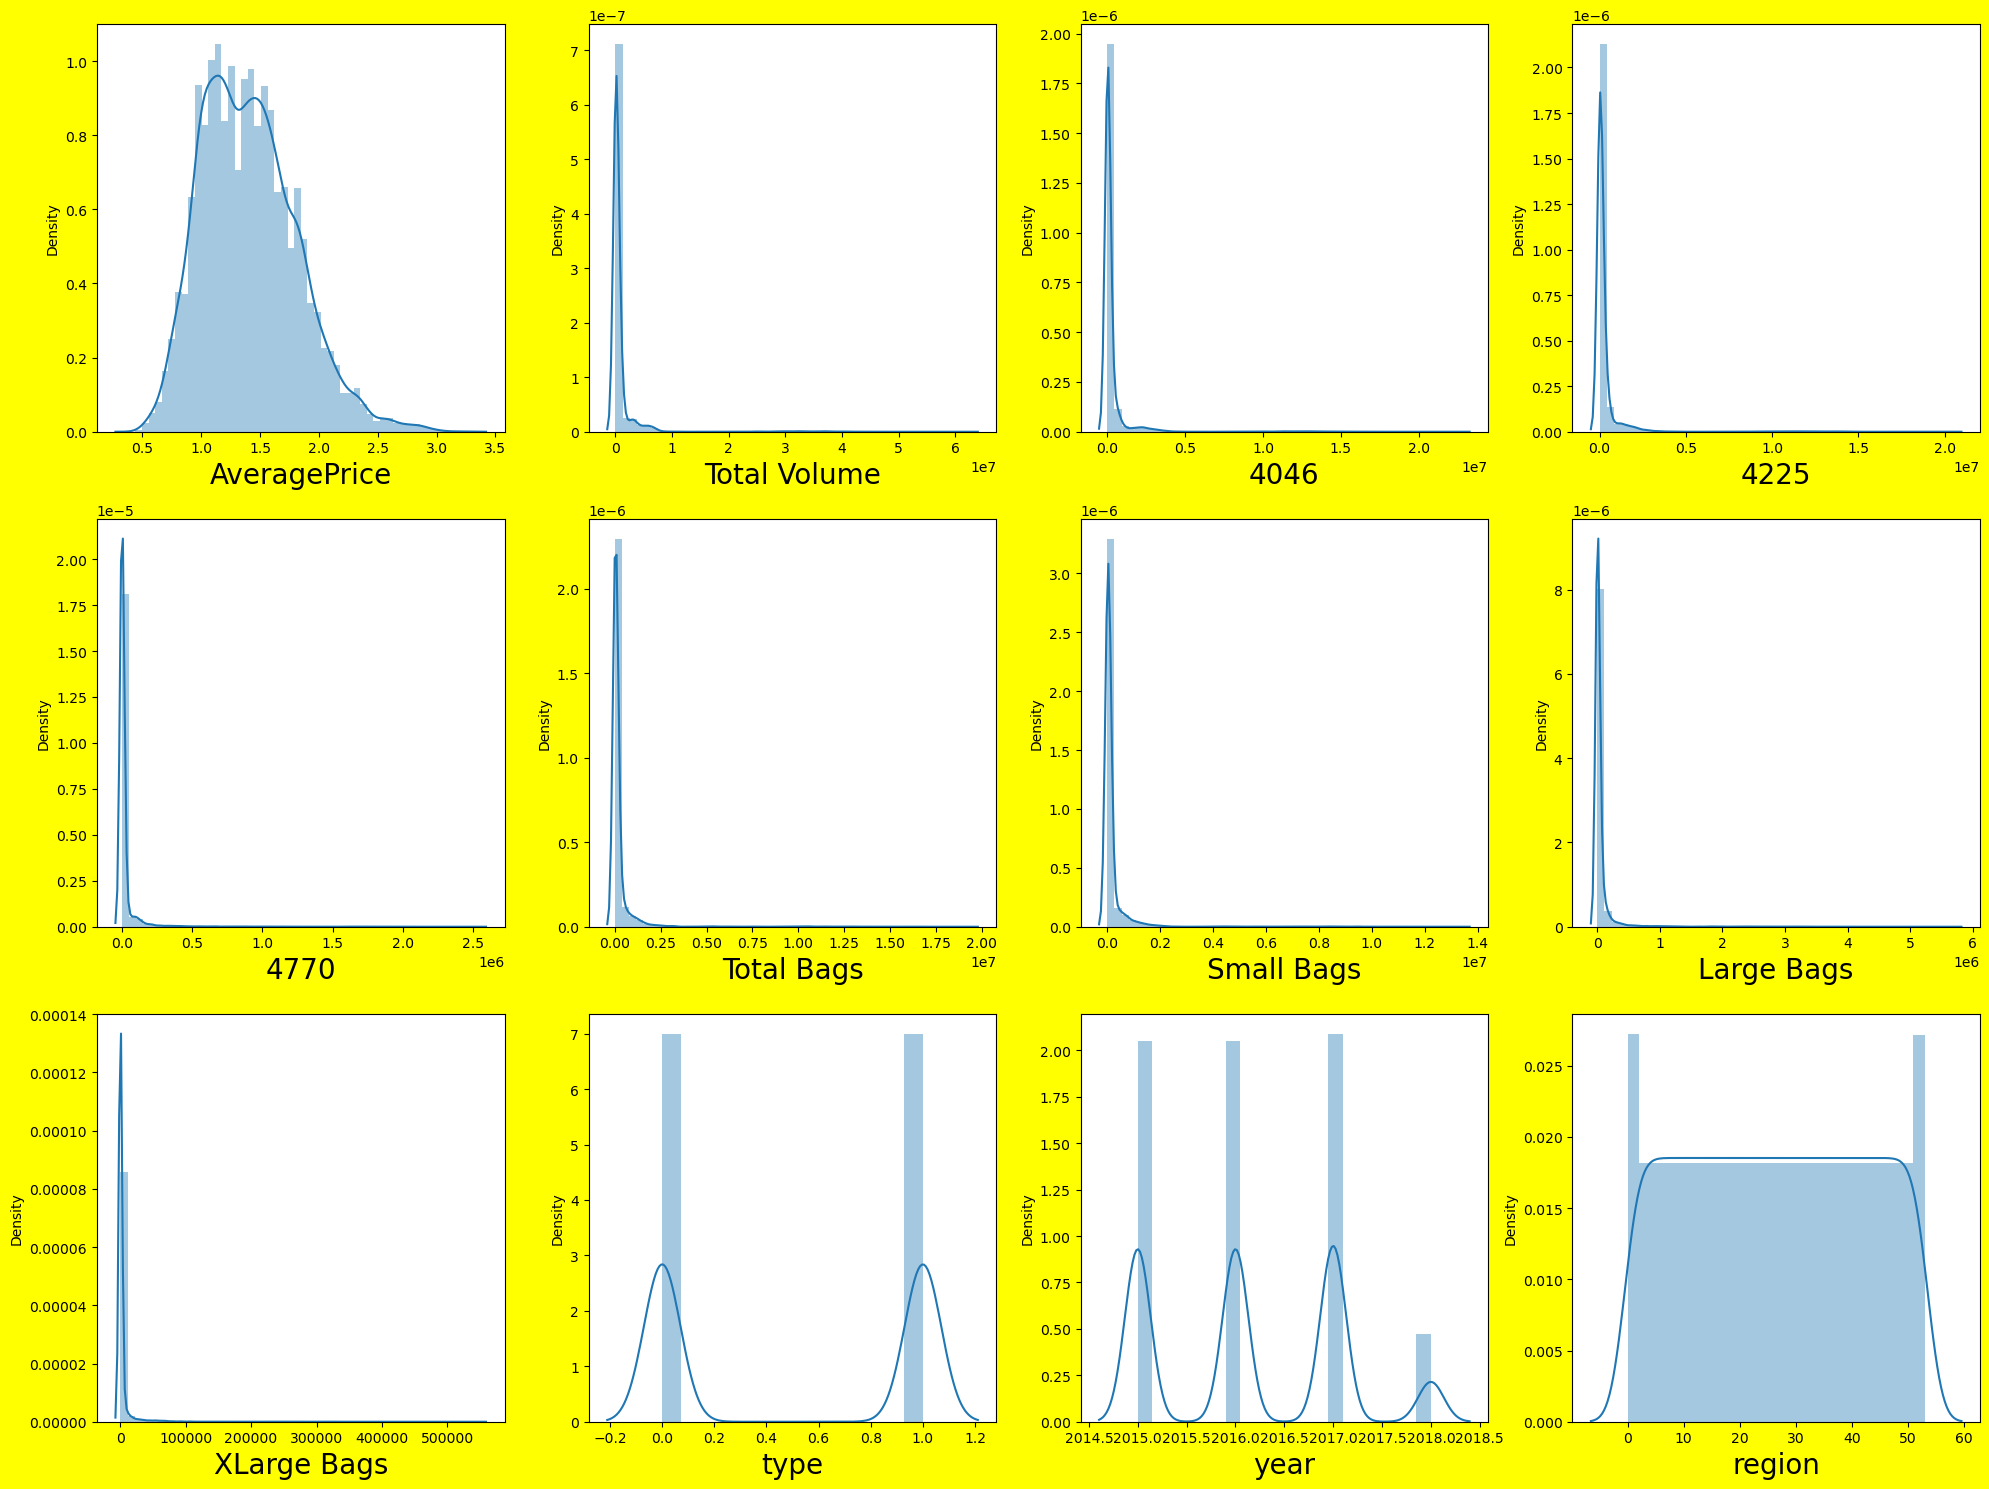

In [26]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in avocado_df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(avocado_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

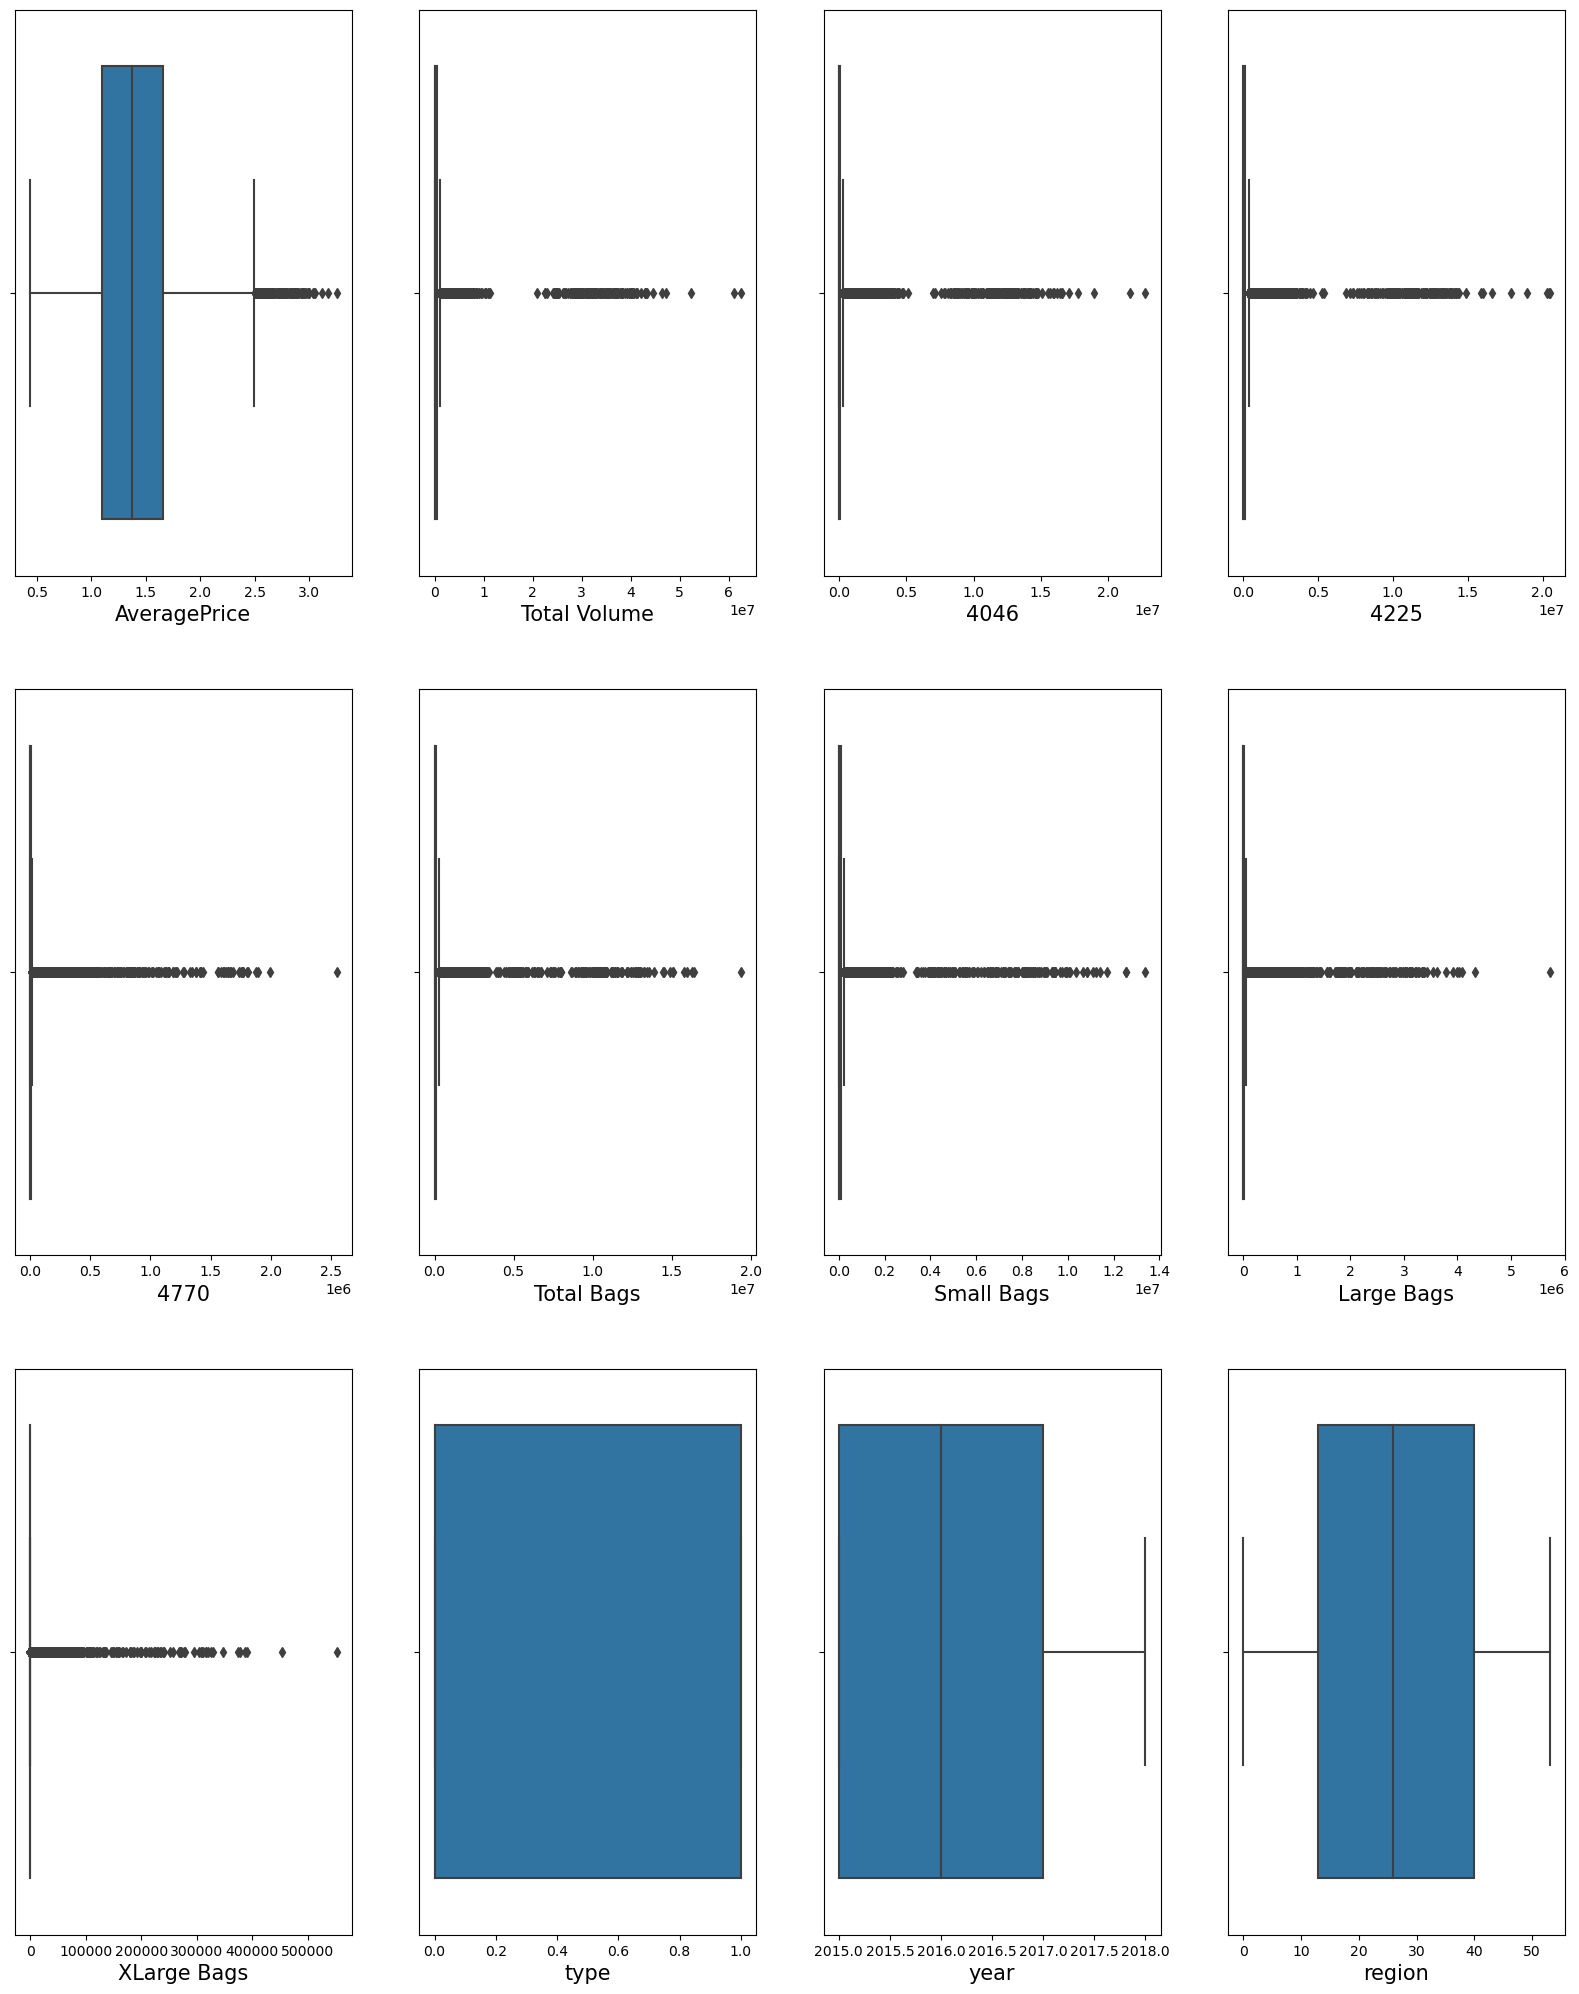

In [27]:
# Now visualize the data using boxplot for getting more idea abot outliers
plt.figure(figsize =(20,25))
graph = 1

for column in avocado_df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(avocado_df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

- From the boxplot, We noticed that,Outliers are present in all columns except year column. 

# Checking Correlation

In [28]:
avocado_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


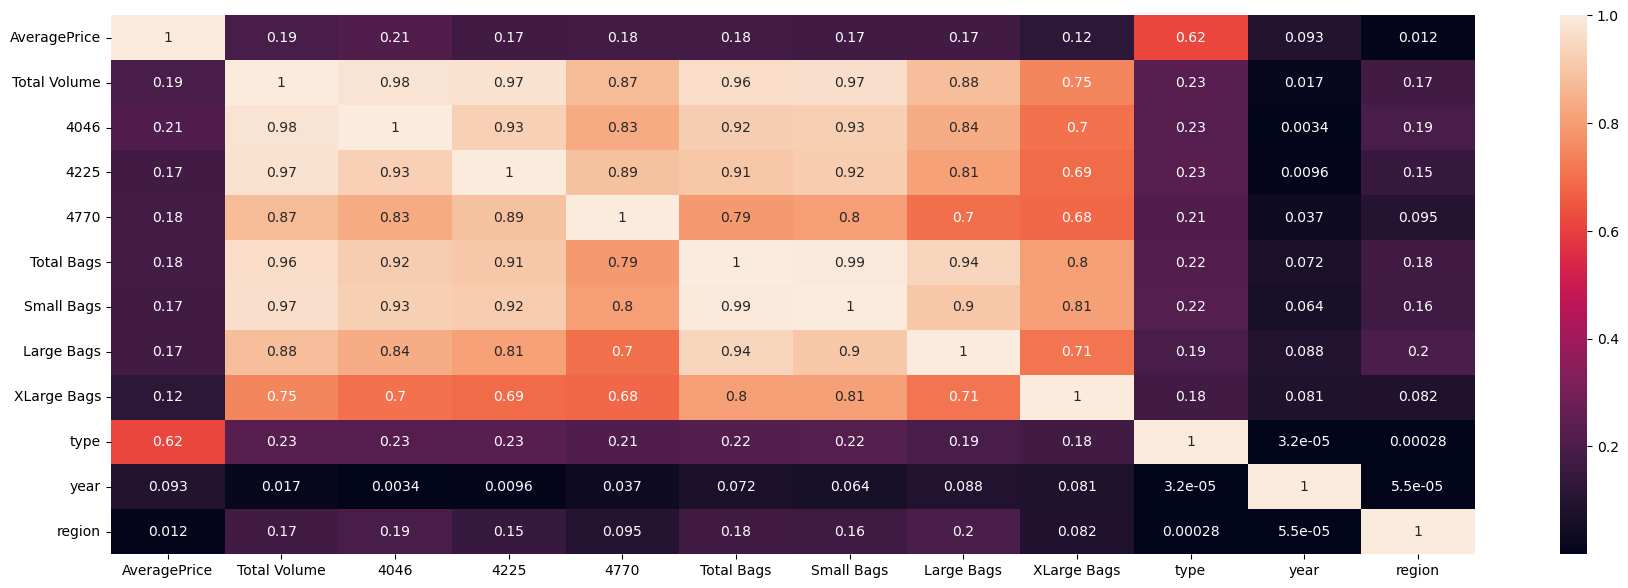

In [29]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=avocado_df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

- We can see there is strong positive corelation between columns:['Total Volume' and 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'] and thus we can say multi-collineaerity is present in multiple columns.

In [30]:
# here we can drop  'Small Bags', 'Large Bags', 'XLarge Bags' beacuse total bags is the sum of all bags columns.
avocado_df.drop('Small Bags',axis=1,inplace=True)

In [31]:
avocado_df.drop('Large Bags',axis=1,inplace=True)

In [32]:
avocado_df.drop('XLarge Bags',axis=1,inplace=True)

In [33]:
avocado_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,2015,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,2018,53


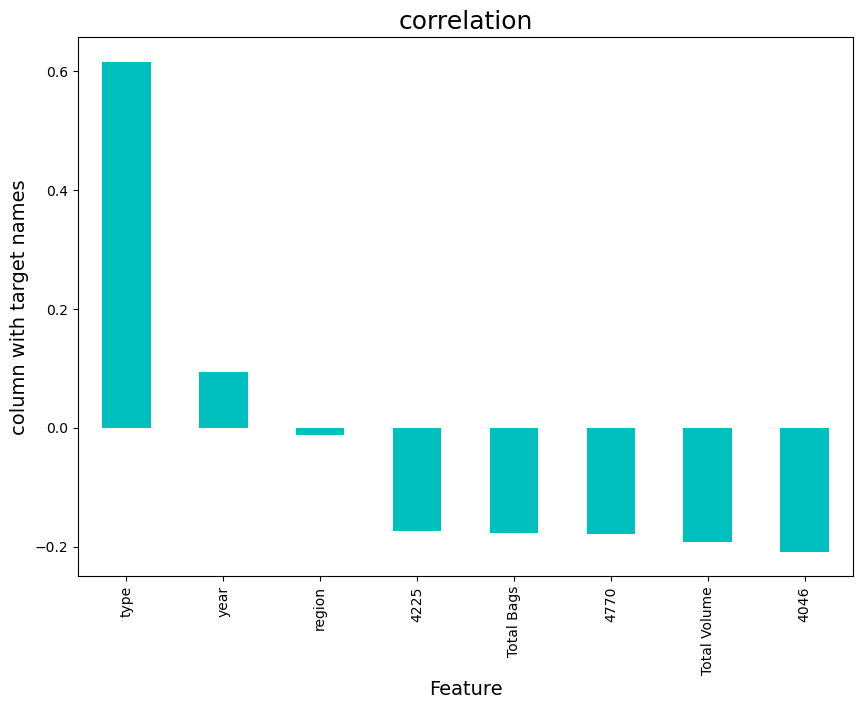

In [34]:
# Correlation of features with Average Price
plt.figure(figsize=(10,7))
avocado_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- Average price is positively correlated with type, year and region.
- Average price is negatively corelated with- total bag, 4225,4770,4046 and total volume.

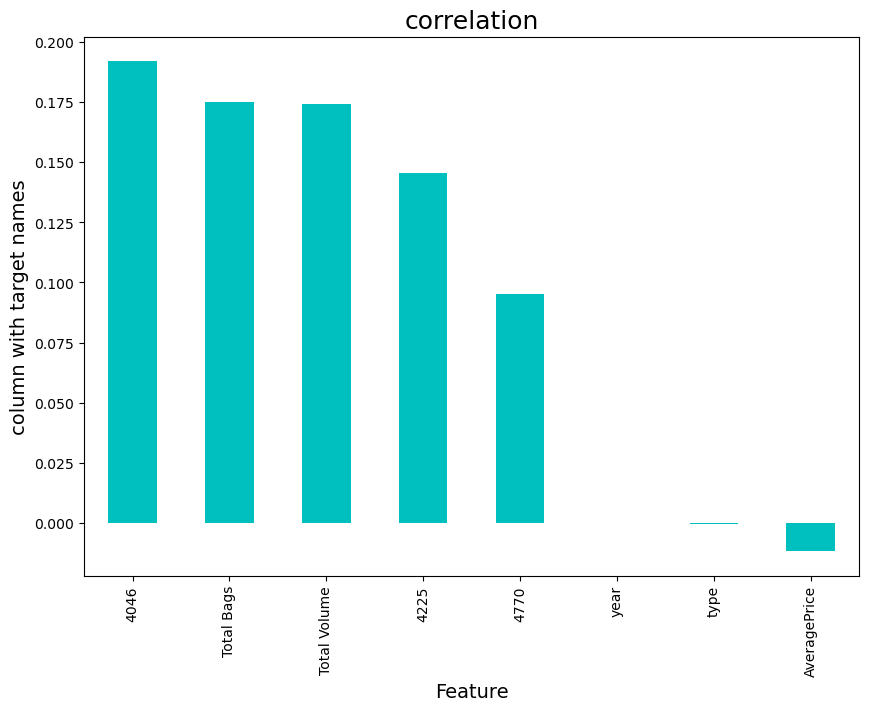

In [35]:
# Correlation of features with Region
plt.figure(figsize=(10,7))
avocado_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- Region is positively correlated with total bags, 4225,4770,4046, total volume.

# Removing outliers using z-score

In [36]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(avocado_df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.999836,1.221282,1.700252
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.999836,1.221282,1.700252
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.999836,1.221282,1.700252
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.999836,1.221282,1.700252
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,1.000164,1.970504,1.700811
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,1.000164,1.970504,1.700811
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,1.000164,1.970504,1.700811
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,1.000164,1.970504,1.700811


In [37]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [38]:
# Now removing the data above zscore and creating new df
avocado_df_new=avocado_df[(z<3).all(axis=1)]
print("Data with outliers::",avocado_df.shape)
print("Data after removing outliers::",avocado_df_new.shape)

Data with outliers:: (18249, 9)
Data after removing outliers:: (17823, 9)


In [39]:
a = avocado_df.shape[0]

In [40]:
b = avocado_df_new.shape[0]

In [41]:
print('Data Loss Percentage - ',((a-b)/a)*100)

Data Loss Percentage -  2.3343744862732203


- It is affordable loss of data now we will check with IQR method


# IQR Method

In [42]:
# 1st Quantile
Q1 = avocado_df.quantile(0.25)

# 3rd Quantile
Q3 = avocado_df.quantile(0.75)

In [43]:
# IQR
IQR = Q3 - Q1
IQR

df2 = avocado_df[~((avocado_df < (Q1 - 1.5 * IQR)) |(avocado_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(13330, 9)

In [44]:
print('Data Loss Percentage - ',((avocado_df.shape[0]-df2.shape[0])/avocado_df.shape[0])*100)

Data Loss Percentage -  26.954901638445943


- 27% is removed using IQR method

- so we are using z-score method

In [45]:
# Now we proceed with new dataset
df=avocado_df_new
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,2015,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,2018,53


# Checking For Skewness

In [46]:
df.skew()

AveragePrice    0.384974
Total Volume    3.638205
4046            4.450558
4225            4.128335
4770            4.792655
Total Bags      4.330215
type           -0.018069
year            0.221932
region          0.012571
dtype: float64

- skewness is present in Total Volume, 4046, 4225, 4770, Total Bags columns


In [47]:
df['Total Volume']=np.cbrt(df['Total Volume'])

In [48]:
df['4046']=np.cbrt(df['4046'])

In [49]:
df['4225']=np.cbrt(df['4225'])

In [50]:
df['Total Bags']=np.cbrt(df['Total Bags'])

In [51]:
df.skew()

AveragePrice    0.384974
Total Volume    1.284835
4046            1.561265
4225            1.268589
4770            4.792655
Total Bags      1.350100
type           -0.018069
year            0.221932
region          0.012571
dtype: float64

- Now Skewness is removed from database.

# Solution-1.('Classification Model to find Region )

# diving data in (features)x and (lables)y

In [52]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,1.33,40.049235,10.120997,37.903460,48.16,20.564634,0,2015,0
1,1.35,38.001150,8.768933,35.473513,58.33,21.183249,0,2015,0
2,0.93,49.079175,9.262632,47.790416,130.50,20.120399,0,2015,0
3,1.08,42.906983,10.421946,41.597133,72.58,17.978534,0,2015,0
4,1.28,37.093893,9.800999,35.260208,75.78,18.355039,0,2015,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.00,23.810234,1,2018,53
18245,1.71,24.037003,10.602029,15.083241,0.00,21.002902,1,2018,53
18246,1.87,23.966829,10.602681,13.486113,727.94,21.100134,1,2018,53
18247,1.93,25.305697,11.517001,14.392048,727.01,22.219254,1,2018,53


In [53]:
x= df.drop(['region'],axis=1)
y=df['region']

In [54]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year
0,1.33,40.049235,10.120997,37.903460,48.16,20.564634,0,2015
1,1.35,38.001150,8.768933,35.473513,58.33,21.183249,0,2015
2,0.93,49.079175,9.262632,47.790416,130.50,20.120399,0,2015
3,1.08,42.906983,10.421946,41.597133,72.58,17.978534,0,2015
4,1.28,37.093893,9.800999,35.260208,75.78,18.355039,0,2015
...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.00,23.810234,1,2018
18245,1.71,24.037003,10.602029,15.083241,0.00,21.002902,1,2018
18246,1.87,23.966829,10.602681,13.486113,727.94,21.100134,1,2018
18247,1.93,25.305697,11.517001,14.392048,727.01,22.219254,1,2018


In [55]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17823, dtype: int32

In [56]:
x.shape

(17823, 8)

In [57]:
y.shape

(17823,)

# Standardization of data

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year
0,-0.186852,-0.374382,-0.709339,0.033036,-0.331438,-0.646115,-1.009074,-1.216592
1,-0.135025,-0.425675,-0.752886,-0.049635,-0.331160,-0.622034,-1.009074,-1.216592
2,-1.223406,-0.148229,-0.736985,0.369410,-0.329189,-0.663408,-1.009074,-1.216592
3,-0.834699,-0.302810,-0.699646,0.158702,-0.330771,-0.746786,-1.009074,-1.216592
4,-0.316421,-0.448397,-0.719646,-0.056892,-0.330683,-0.732129,-1.009074,-1.216592
...,...,...,...,...,...,...,...,...
17818,0.590563,-0.732490,-0.626370,-0.864548,-0.332752,-0.519772,0.991007,1.972757
17819,0.797874,-0.775404,-0.693846,-0.743352,-0.332752,-0.629055,0.991007,1.972757
17820,1.212496,-0.777162,-0.693825,-0.797689,-0.312878,-0.625270,0.991007,1.972757
17821,1.367979,-0.743630,-0.664377,-0.766867,-0.312904,-0.581705,0.991007,1.972757


In [59]:
#Checking multicollinearity among features with variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,1.869223,AveragePrice
1,218.249142,Total Volume
2,25.540802,4046
3,44.161497,4225
4,1.684325,4770
5,29.399455,Total Bags
6,2.613160,type
7,1.309503,year


- Here we can see that there is no multicollinearity among features as the vif score is under limit<=10.
- Keeping the acceptable range as below or equal 10, we observe the VIF of 'Total Volume', '4225','Total Bags','4046' is high.
- but we not deleting any data 

# Model Building

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [61]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.13120844406164867  on Random_state  27


In [62]:
# Splitting data into Train-Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [63]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)

        print('=======================Train result======================')
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')


    elif train==False:
        pred=clf.predict(x_test)

        print('=======================Test Result=======================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\nClassification report\n',classification_report(y_test,pred,digits=2))

# 1.Logistic Regression

In [64]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predlr))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
=======================Train result======================
accuracy score:4.16%
=======================Test Result=======================
accuracy_score:3.52%


Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00       108
           5       0.00      0.00      0.00       107
           6       0.11      0.27      0.15        95
           7       0.01      0.06      0.02        86
           8       0.04      0.02      0.03        99
           9       0.00      0.00      0.00       105
          10       0.00      0.00      0.00        98
          11       0.00      0.

In [65]:
# cv score for Logistic Regression
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvlr)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlr)-cvlr)

CV score for Decision Tree Classifier: 0.0354579455140465
And Difference between CV and accuracy_score= -0.00029804276484133446


# 2.KNN Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predknn))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[81  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 53 ...  3  0  0]
 ...
 [ 0  0 11 ... 14  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  3  7 ...  1  0 17]]
=======================Train result======================
accuracy score:4.16%
=======================Test Result=======================
accuracy_score:3.52%


Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00       108
           5       0.00      0.00      0.00       107
           6       0.11      0.27      0.15        95
           7       0.01      0.06      0.02        86
           8       0.04      0.02      0.03        99
           9       0.00      0.00      0.00       105
          10       0.00      0.00      0.00      

In [68]:
# cv score for KNN Model
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score for KNN Model:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score for KNN Model: 0.3283493498173255
And Difference between CV and accuracy_score= 0.14892762792720415


# 3 Decision Tree Classifier

In [69]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,preddt))

metric_score(dt,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[81  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 53 ...  3  0  0]
 ...
 [ 0  0 11 ... 14  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  3  7 ...  1  0 17]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:75.52%


Classification report
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       107
           1       0.71      0.60      0.65        91
           2       0.87      0.83      0.85       103
           3       0.82      0.74      0.78       113
           4       0.80      0.90      0.84       108
           5       0.64      0.63      0.63       107
           6       0.89      0.89      0.89        95
           7       0.81      0.80      0.81        86
           8       0.87      0.94      0.90        99
           9       0.79      0.76      0.78       105
          10       0.60      0.63      0.61   

In [70]:
# cv score for Decision Tree Classifier
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvdt)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddt)-cvdt)

CV score for Decision Tree Classifier: 0.5220133074551028
And Difference between CV and accuracy_score= -0.04473632971057312


# 4 RandomForestClassifier

In [71]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predrfc))

metric_score(rfc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[ 91   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   1]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   2   1 ...   0   0  71]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:86.24%


Classification report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.81      0.79      0.80        91
           2       0.92      0.98      0.95       103
           3       0.93      0.81      0.87       113
           4       0.94      0.94      0.94       108
           5       0.88      0.75      0.81       107
           6       0.91      0.94      0.92        95
           7       0.94      0.88      0.91        86
           8       0.93      0.98      0.96        99
           9       0.79      0.84      0.81       105
          

In [72]:
# cv score for RandomForestClassifier
cvrfc=cross_val_score(rfc,x,y,cv=5).mean()
print('CV score for RandomForestClassifier:',cvrfc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrfc)-cvrfc)

CV score for RandomForestClassifier: 0.6366963542232359
And Difference between CV and accuracy_score= 0.22565636692881197


# 5 Support vector classifier

In [73]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predsvc))

metric_score(svc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
=======================Train result======================
accuracy score:6.42%
=======================Test Result=======================
accuracy_score:5.84%


Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00       108
           5       0.00      0.00      0.00       107
           6       0.23      0.17      0.20        95
           7       0.12      0.13      0.13        86
           8       0.32      0.43      0.37        99
           9       0.00      0.00      0.00       105
          10       0.00      0.00      0.00        98
          11       0.00      0.

In [74]:
# cv score for SVC
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score for SVC:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score for SVC: 0.050773497795470676
And Difference between CV and accuracy_score= 0.007576979107465548


# We choose Random Forest Classifier for hyperparameter tuning because training and test accuracy is 86%

# HYPER PARAMETER TUNING

In [75]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier().fit(x_train,y_train)
parameters = {'n_estimators':[100],
             'criterion':['gini','entropy'],
             'max_depth':[2,4,6],
             'bootstrap':[True] ,
             'max_features': [3],
}
GCV = GridSearchCV(estimator =RandomForestClassifier(),param_grid=parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 3,
 'n_estimators': 100}

In [76]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.6212829624088274

# Our best model with best parameters has given an excellent accuracy of 62%

# roc auc curve

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [88]:
fpr1, tpr1, thresh1 = roc_curve(y_test,pred, pos_label=1)

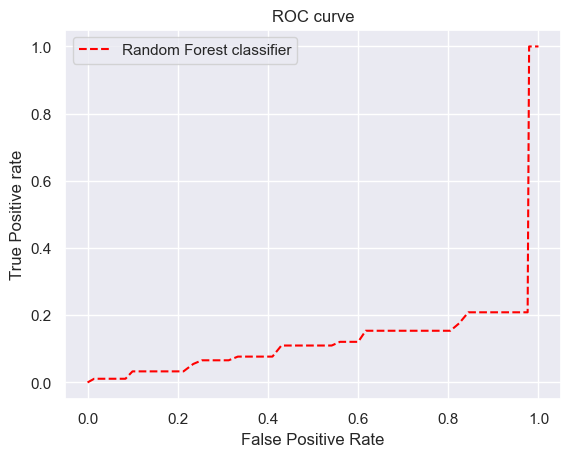

In [89]:
df = RandomForestClassifier(random_state=27)
sns.set_theme(style="darkgrid")
df.fit(x_train, y_train)
fpr1, tpr1, thresh1 = roc_curve(y_test,predrfc, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random Forest classifier')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# Saving the best classification model

In [90]:
import pickle
filename = 'avocado.pkl'
pickle.dump(GCV,open(filename,'wb'))

In [91]:
loaded_model = pickle.load(open('avocado.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

62.12829624088274


In [92]:
### Predicting the Output
original = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_new = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new.sample(20)

,Original,Predicted
2145,5,27
1392,43,43
504,39,39
3853,49,49
3639,33,33
1897,14,23
3727,34,23
1141,42,42
5207,3,3
2395,25,25


Text(0.5, 1.0, 'Original vs predicted  graph')

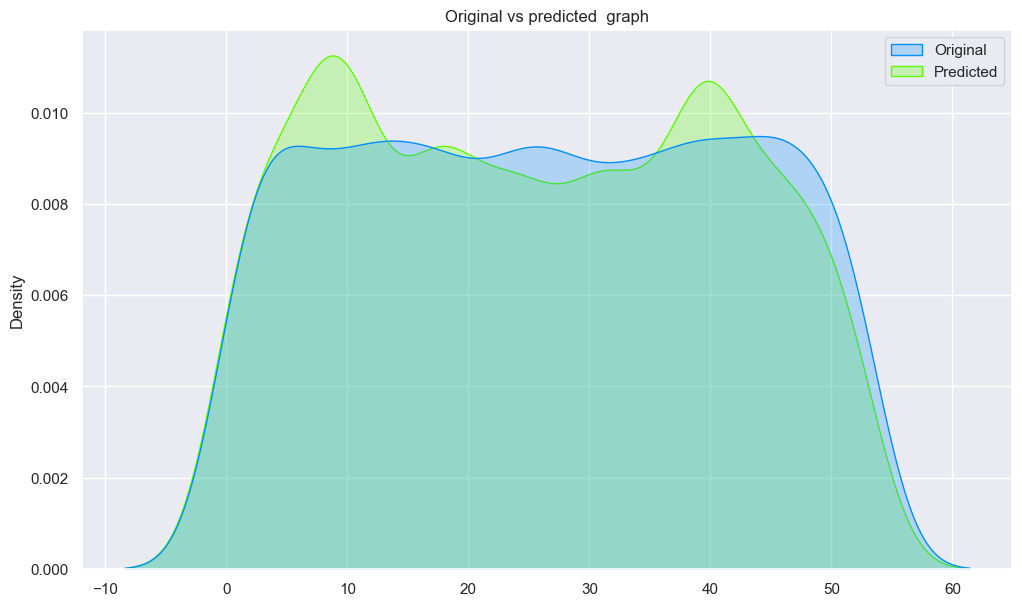

In [136]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# Conclusion:--
# We can see our Classification model has predicted almost same ouputs.


# Solution 2 -(To find Average price using Regression)

In [93]:
avocado_df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,1.33,40.049235,10.120997,37.903460,48.16,20.564634,0,2015,0
1,1.35,38.001150,8.768933,35.473513,58.33,21.183249,0,2015,0
2,0.93,49.079175,9.262632,47.790416,130.50,20.120399,0,2015,0
3,1.08,42.906983,10.421946,41.597133,72.58,17.978534,0,2015,0
4,1.28,37.093893,9.800999,35.260208,75.78,18.355039,0,2015,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.00,23.810234,1,2018,53
18245,1.71,24.037003,10.602029,15.083241,0.00,21.002902,1,2018,53
18246,1.87,23.966829,10.602681,13.486113,727.94,21.100134,1,2018,53
18247,1.93,25.305697,11.517001,14.392048,727.01,22.219254,1,2018,53


In [94]:
x=avocado_df_new.drop(columns='AveragePrice')
y=avocado_df_new['AveragePrice']

In [95]:
x.shape

(17823, 8)

In [96]:
y.shape

(17823,)

# Standardization of data

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,-0.374382,-0.709339,0.033036,-0.331438,-0.646115,-1.009074,-1.216592,-1.693942
1,-0.425675,-0.752886,-0.049635,-0.331160,-0.622034,-1.009074,-1.216592,-1.693942
2,-0.148229,-0.736985,0.369410,-0.329189,-0.663408,-1.009074,-1.216592,-1.693942
3,-0.302810,-0.699646,0.158702,-0.330771,-0.746786,-1.009074,-1.216592,-1.693942
4,-0.448397,-0.719646,-0.056892,-0.330683,-0.732129,-1.009074,-1.216592,-1.693942
...,...,...,...,...,...,...,...,...
17818,-0.732490,-0.626370,-0.864548,-0.332752,-0.519772,0.991007,1.972757,1.733671
17819,-0.775404,-0.693846,-0.743352,-0.332752,-0.629055,0.991007,1.972757,1.733671
17820,-0.777162,-0.693825,-0.797689,-0.312878,-0.625270,0.991007,1.972757,1.733671
17821,-0.743630,-0.664377,-0.766867,-0.312904,-0.581705,0.991007,1.972757,1.733671


# Regression Model Building

In [99]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [100]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.4834873989122128  on Random_state  173


In [101]:
# Splitting data into Train-Test

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [103]:
# 1. Linear Regression

In [104]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_lr)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_lr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_lr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_lr)*100))

R2 score on test data  48.348739891221285
Mean Absolute Error  21.80593994403891
Mean Squared Error: 7.817095700065075
Root Meand Squared Error: 2.795906954829698


In [105]:
# cv score for Linear Regression 
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_lr)-cvlr)

CV score  for Linear rgerssion: 0.08938872740520205
And Difference between CV and r2_score = 0.3940986715070108


# 2. Support Vector Regressor

In [106]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_svr)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_svr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_svr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)*100))

R2 score on test data  25.292480352599746
Mean Absolute Error  26.357964349891184
Mean Squared Error: 11.306516614857243
Root Meand Squared Error: 3.3625164110911405


In [107]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_svr)-cvsvr)

CV score  for Support Vector Regressor: -0.35710508208773695
And Difference between CV and r2_score = 0.6100298856137344


# 3. Decision Tree Regressor

In [108]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_dtr)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_dtr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_dtr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)*100))

R2 score on test data  67.51497653220034
Mean Absolute Error  14.525902375163643
Mean Squared Error: 4.916405461006171
Root Meand Squared Error: 2.217296881566871


In [109]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_dtr)-cvdtr)

CV score  for Decision Tree Regressor: -0.46278397722877324
And Difference between CV and r2_score = 1.1379337425507765


# 4. K Neighbors Regressor

In [110]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_knn)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_knn)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_knn)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)*100))

R2 score on test data  59.56452715447173
Mean Absolute Error  18.34838227043202
Mean Squared Error: 6.1196563306527025
Root Meand Squared Error: 2.473793914345474


In [111]:
# cv score for K Neighbors Regressor
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Regressor:',cvknn)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_knn)-cvknn)

CV score  for K Neighbors Regressor: -0.2739453085944398
And Difference between CV and r2_score = 0.8695905801391571


# 5.Random Forest Regressor

In [112]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_rfr)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_rfr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_rfr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rfr)*100))

R2 score on test data  83.78250887004506
Mean Absolute Error  11.005842528520668
Mean Squared Error: 2.4544160183280344
Root Meand Squared Error: 1.5666575944755874


In [113]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_rfr)-cvrfr)

CV score  for Random Forest Regressor: 0.17030742171535107
And Difference between CV and r2_score = 0.6675176669850995


# 6.Ada Boost Regressor

In [114]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
pred_adr=adr.predict(x_test)
pred_train=adr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_adr)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_adr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_adr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_adr)*100))

R2 score on test data  47.769476046143225
Mean Absolute Error  22.610830062859726
Mean Squared Error: 7.904763666016468
Root Meand Squared Error: 2.811541154956916


In [115]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x,y,cv=5).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_adr)-cvadr)

CV score  for Ada Boost Regressor: -0.026803738582549207
And Difference between CV and r2_score = 0.5044984990439815


# 7.Gradient Boosting Regressor

In [116]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_gbr)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_gbr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_gbr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_gbr)*100))

R2 score on test data  66.80415566233631
Mean Absolute Error  16.76773387104925
Mean Squared Error: 5.023983761199203
Root Meand Squared Error: 2.2414244937537386


In [117]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_gbr)-cvgbr)

CV score  for Gradient Boosting Regressor: 0.305862219708311
And Difference between CV and r2_score = 0.36217933691505205


# 8. Lasso Regression

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [119]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_ls)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_ls)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_ls)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ls)*100))

R2 score on test data  33.50403214253791
Mean Absolute Error  25.470992909438024
Mean Squared Error: 10.063749525481288
Root Meand Squared Error: 3.172341331805468


In [120]:
# cv score for Lasso Regression
cvls=cross_val_score(ls,x,y,cv=5).mean()
print('CV score  for Lasso Regression:',cvls)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_ls)-cvls)

CV score  for Lasso Regression: -0.38270167531870125
And Difference between CV and r2_score = 0.7177419967440803


# 9. Ridge Regression

In [121]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_rg)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_rg)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_rg)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rg)*100))


R2 score on test data  48.34869370184328
Mean Absolute Error  21.80594448301332
Mean Squared Error: 7.817102690539023
Root Meand Squared Error: 2.795908204955775


In [122]:
# cv score forRidge Regression
cvrg=cross_val_score(rg,x,y,cv=5).mean()
print('CV score  for Ridge Regression:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_rg)-cvrg)

CV score  for Ridge Regression: 0.08938358619907336
And Difference between CV and r2_score = 0.39410335081935943


# We can see r2 score test data is 83% in Random Forest Regressor and 67 % in Gradient Boosting Regressor

# We can choose Gradient Boosting Regressor for Hyper parameter tuning


# Hyper Parameter Tuning

In [123]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [124]:
#Selecting few parameter list to pass in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'alpha':[0,0.1,0.9,1.0], 
             'criterion':['friedman_mse','squared_error'],
             'learning_rate':[0.1,1,10],
             'max_depth':[2,3,4]}

In [126]:
# Start Tuning 
gbr1=GradientBoostingRegressor()
GCV = GridSearchCV(gbr1,parameter,cv=5)

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'alpha': 0.1, 'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 3}


In [127]:
#Applying best parameter values on Gradient Boosting Regressor Algorithm 
avg_price_best=GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', learning_rate=1, max_depth=3)
avg_price_best.fit(x_train,y_train)
avg_price_best.score(x_train,y_train)

0.8204087533207041

In [129]:
predgbr1=avg_price_best.predict(x_test)
print("r2_score=",r2_score(y_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr1)))

r2_score= 0.7472752840655111 

Mean Absolute Error: 0.14551944588774174
Mean Squared Error: 0.038248307709648495
Root Meand Squared Error: 0.1955717456833898


In [130]:
# Saving the best Regressor model

In [131]:
import joblib

joblib.dump(avg_price_best,'avocado_price.obj')

['avocado_price.obj']

In [132]:
avg_price_model=joblib.load('avocado_price.obj')

In [133]:
# Viewing Attributes of the best model
avg_price_model

GradientBoostingRegressor(alpha=0.1, learning_rate=1)

# Prediction

In [134]:
ori1 = np.array(y_test)
predicted1 = np.array(avg_price_model.predict(x_test))
df_new1 = pd.DataFrame({"Original":ori1,"Predicted":predicted1},index= range(len(ori1)))
df_new1

,Original,Predicted
0,1.65,1.946310
1,1.90,1.643580
2,1.03,0.802781
3,1.46,1.275117
4,1.35,1.814498
...,...,...
5342,1.66,1.668099
5343,0.86,0.991124
5344,1.46,1.035383
5345,1.52,1.151990


Text(0.5, 1.0, 'Original vs predicted  graph')

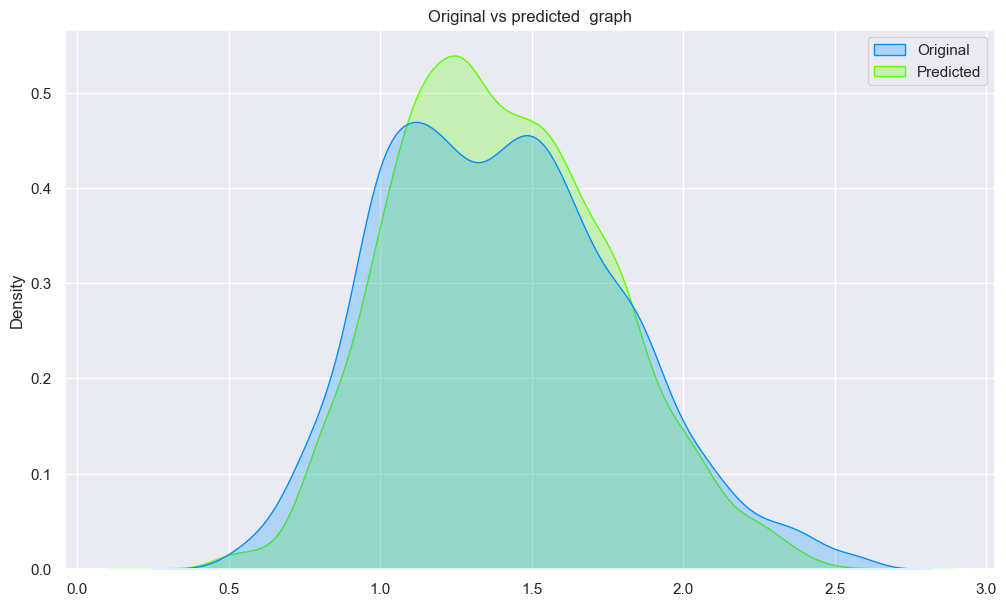

In [135]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# Conclusion:--
# We can see our Regression model has predicted almost same ouputs.